## Draws julia fractal

See https://tomroelandts.com/articles/how-to-compute-colorful-fractals-using-numpy-and-matplotlib 

In [32]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def argand(a):
    for x in range(len(a)):
        plt.plot([0,a[x].real],[0,a[x].imag],'ro-',label='python')
    limit=np.max(np.ceil(np.absolute(a))) # set limits for axis
    plt.xlim((-limit,limit))
    plt.ylim((-limit,limit))
    plt.ylabel('Imaginary')
    plt.xlabel('Real')
    for x in a:
        plt.polar([0,angle(x)],[0,abs(x)],marker='o')
    plt.show()

In [33]:
complex_real = -0.42

In [34]:
complex_imaginary = 0.6

In [35]:
m = 480*2

In [36]:
n = 320*2

In [37]:
scale = 600

In [38]:
x = np.linspace(-m / scale, m / scale, num=m).reshape((1, m))
y = np.linspace(-n / scale, n / scale, num=n).reshape((n, 1))

In [50]:
Z = np.tile(x, (n, 1)) + 1j * np.tile(y, (1, m))
C = np.full((n, m), complex(complex_real, complex_imaginary))

In [40]:
M = np.full((n, m), True, dtype=bool)
N = np.zeros((n, m))

In [41]:
for i in range(256):
    Z[M] = Z[M] * Z[M] + C[M]
    M[np.abs(Z) > 2] = False
    N[M] = i

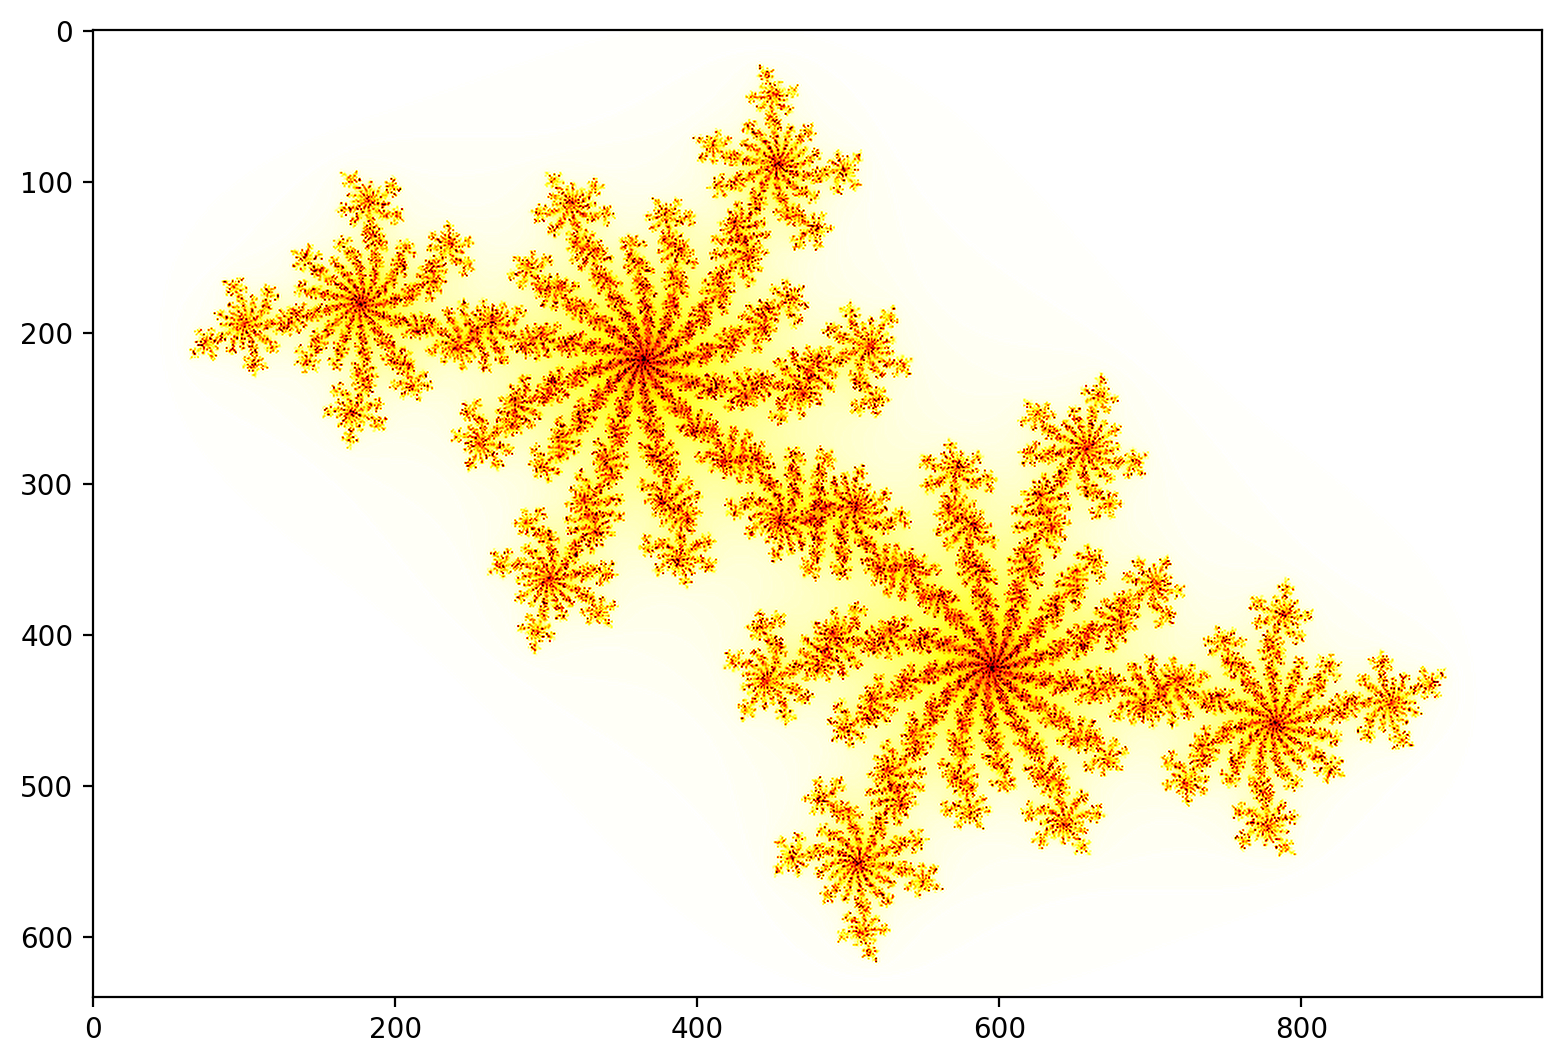

In [49]:
fig = plt.figure(figsize=(m / 100, n / 100), dpi=200)
im = np.flipud(255 - N)
plt.imshow(im, cmap='hot', interpolation="lanczos")